<a href="https://colab.research.google.com/github/christianbammann/introtoML/blob/main/homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### **Problem 1**

**Non-Linear Model**

In [93]:
def model(t_u, w1, w2, b):
    return w2 * t_u**2 + w1 * t_u + b

In [94]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [95]:
# Initialize parameters
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())

# Compute predictions
t_p = model(t_u, w1, w2, b)

# Compute loss
loss = loss_fn(t_p, t_c)

print(loss)

tensor(11709471.)


In [96]:
def training_loop(n_epochs, alpha, params, t_un, t_c):
    for epoch in range(1, n_epochs + 1):

        if params.grad is not None:
            params.grad.zero_()

        t_p = model(t_un, *params)
        loss = loss_fn(t_p, t_c)

        loss.backward()

        with torch.no_grad():
            params -= alpha * params.grad

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss {float(loss):.6f}")

    return params

In [97]:
t_un = 0.1 * t_u
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
trained_params = training_loop(5000, 0.0001, params, t_un, t_c)
print(trained_params)

Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123477
Epoch 2500, Loss 5.377227
Epoch 3000, Loss 4.845285
Epoch 3500, Loss 4.465788
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744
tensor([-0.8881,  0.5570, -0.8753], requires_grad=True)


**Linear Model (from lecture)**

In [98]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

def model_linear(t_u, w, b):
  return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [99]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [100]:
# Training loop
alpha = 1e-4
n_epochs = 5000
t_un = 0.1 * t_u

def training_loop(n_epochs, alpha, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()

        t_p = model_linear(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():
            params -= alpha * params.grad

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss {loss.item():.4f}")

    return params

In [101]:
params = training_loop(n_epochs, alpha, params, t_un, t_c)
print("Trained linear parameters:", params)

Epoch 500, Loss 29.5059
Epoch 1000, Loss 28.9438
Epoch 1500, Loss 28.5053
Epoch 2000, Loss 28.0745
Epoch 2500, Loss 27.6509
Epoch 3000, Loss 27.2344
Epoch 3500, Loss 26.8250
Epoch 4000, Loss 26.4225
Epoch 4500, Loss 26.0267
Epoch 5000, Loss 25.6377
Trained linear parameters: tensor([ 2.5233, -1.2029], requires_grad=True)


Nonlinear vs Linear Plot

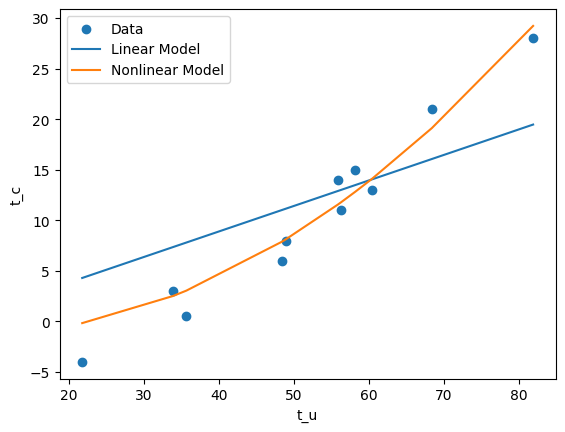

In [102]:
import matplotlib.pyplot as plt

t_u_sorted, indices = torch.sort(t_u)
t_un_sorted = 0.1 * t_u_sorted

with torch.no_grad():
    t_p_lin = model_linear(t_un_sorted, *params)  # trained linear params
    t_p_nonlin = 0.5570 * t_un_sorted**2 + (-0.8881) * t_un_sorted + (-0.8753)

plt.scatter(t_u, t_c, label="Data")
plt.plot(t_u_sorted, t_p_lin, label="Linear Model")
plt.plot(t_u_sorted, t_p_nonlin, label="Nonlinear Model")
plt.xlabel("t_u")
plt.ylabel("t_c")
plt.legend()
plt.show()

### **Problem 2**

In [104]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split

In [108]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [120]:
X = df[["area", "bedrooms", "bathrooms", "stories", "parking"]].values
y = df["price"].values

In [121]:
X = (X - X.mean(axis=0)) / X.std(axis=0)
y = (y - y.mean()) / y.std()

In [122]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [123]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Linear model: U = W5*X5 + W4*X4 + W3*X3 + W2*X2 + W1*X1 + B
def model(X, w, b):
    return X @ w + b

def loss_fn(y_pred, y_true):
    squared_diffs = (y_pred - y_true) ** 2
    return squared_diffs.mean()

In [125]:
w = torch.zeros((5, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [128]:
alpha = 0.00001
n_epochs = 5000

for epoch in range(1, n_epochs + 1):
    y_pred = model(X_train, w, b)
    loss = loss_fn(y_pred, y_train)

    loss.backward()

    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad

    w.grad.zero_()
    b.grad.zero_()

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 500, Loss: 0.3866
Epoch 1000, Loss: 0.3866
Epoch 1500, Loss: 0.3866
Epoch 2000, Loss: 0.3866
Epoch 2500, Loss: 0.3866
Epoch 3000, Loss: 0.3866
Epoch 3500, Loss: 0.3866
Epoch 4000, Loss: 0.3866
Epoch 4500, Loss: 0.3866
Epoch 5000, Loss: 0.3866


### **Problem 3**

In [129]:
import torch.nn as nn
import torch.optim as optim

class HousingModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(5, 8)   # input → hidden (8 nodes)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8, 1)   # hidden → output

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = HousingModel()

In [130]:
optimizer = optim.SGD(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

In [132]:
def training_loop(n_epochs, optimizer, model, loss_fn,
                  X_train, y_train, X_val, y_val):

    for epoch in range(1, n_epochs + 1):
        y_pred = model(X_train)
        loss_train = loss_fn(y_pred, y_train)

        with torch.no_grad():
            y_val_pred = model(X_val)
            loss_val = loss_fn(y_val_pred, y_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 20 == 0:
            print(f"Epoch {epoch}, "
                  f"Training loss {loss_train.item():.4f}, "
                  f"Validation loss {loss_val.item():.4f}")

In [133]:
n_epochs = 200

training_loop(
    n_epochs = n_epochs,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    X_train = X_train,
    y_train = y_train,
    X_val = X_val,
    y_val = y_val
)

Epoch 1, Training loss 1.0281, Validation loss 1.6741
Epoch 20, Training loss 0.9926, Validation loss 1.6290
Epoch 40, Training loss 0.9593, Validation loss 1.5859
Epoch 60, Training loss 0.9294, Validation loss 1.5467
Epoch 80, Training loss 0.9026, Validation loss 1.5109
Epoch 100, Training loss 0.8784, Validation loss 1.4780
Epoch 120, Training loss 0.8564, Validation loss 1.4476
Epoch 140, Training loss 0.8363, Validation loss 1.4194
Epoch 160, Training loss 0.8178, Validation loss 1.3933
Epoch 180, Training loss 0.8009, Validation loss 1.3688
Epoch 200, Training loss 0.7852, Validation loss 1.3458


In [134]:
import time
from sklearn.metrics import r2_score

start_time = time.time()

training_loop(
    n_epochs = 200,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    X_train = X_train,
    y_train = y_train,
    X_val = X_val,
    y_val = y_val
)

training_time = time.time() - start_time
print(f"\nTraining time: {training_time:.2f} seconds")

with torch.no_grad():
    y_val_pred = model(X_val)
r2 = r2_score(y_val.numpy(), y_val_pred.numpy())
print(f"Validation R^2 score: {r2:.4f}")

Epoch 1, Training loss 0.7845, Validation loss 1.3447
Epoch 20, Training loss 0.7707, Validation loss 1.3241
Epoch 40, Training loss 0.7571, Validation loss 1.3036
Epoch 60, Training loss 0.7443, Validation loss 1.2840
Epoch 80, Training loss 0.7321, Validation loss 1.2652
Epoch 100, Training loss 0.7205, Validation loss 1.2473
Epoch 120, Training loss 0.7095, Validation loss 1.2301
Epoch 140, Training loss 0.6989, Validation loss 1.2135
Epoch 160, Training loss 0.6889, Validation loss 1.1975
Epoch 180, Training loss 0.6792, Validation loss 1.1821
Epoch 200, Training loss 0.6698, Validation loss 1.1671

Training time: 0.16 seconds
Validation R^2 score: 0.1942


In [135]:
# 3.b

In [137]:
import torch.nn as nn
import torch.optim as optim
import time
from sklearn.metrics import r2_score

class HousingModelDeep(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(5, 16)   # input → hidden1
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(16, 8)   # hidden1 → hidden2
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(8, 4)    # hidden2 → hidden3
        self.relu3 = nn.ReLU()
        self.output = nn.Linear(4, 1) # hidden3 → output

    def forward(self, x):
        x = self.fc1(x); x = self.relu1(x)
        x = self.fc2(x); x = self.relu2(x)
        x = self.fc3(x); x = self.relu3(x)
        x = self.output(x)
        return x

model_deep = HousingModelDeep()

In [138]:
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model_deep.parameters(), lr=1e-3)

In [139]:
def training_loop(n_epochs, optimizer, model, loss_fn, X_train, y_train, X_val, y_val):
    for epoch in range(1, n_epochs + 1):
        y_pred = model(X_train)
        loss_train = loss_fn(y_pred, y_train)

        with torch.no_grad():
            y_val_pred = model(X_val)
            loss_val = loss_fn(y_val_pred, y_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 20 == 0:
            print(f"Epoch {epoch}, "
                  f"Training loss {loss_train.item():.4f}, "
                  f"Validation loss {loss_val.item():.4f}")

In [140]:
start_time = time.time()

training_loop(
    n_epochs = 200,
    optimizer = optimizer,
    model = model_deep,
    loss_fn = loss_fn,
    X_train = X_train,
    y_train = y_train,
    X_val = X_val,
    y_val = y_val
)

training_time = time.time() - start_time
print(f"\nTraining time: {training_time:.2f} seconds")

with torch.no_grad():
    y_val_pred = model_deep(X_val)
r2 = r2_score(y_val.numpy(), y_val_pred.numpy())
print(f"Validation R² score: {r2:.4f}")

Epoch 1, Training loss 0.9973, Validation loss 1.4837
Epoch 20, Training loss 0.9879, Validation loss 1.4788
Epoch 40, Training loss 0.9788, Validation loss 1.4741
Epoch 60, Training loss 0.9705, Validation loss 1.4701
Epoch 80, Training loss 0.9629, Validation loss 1.4665
Epoch 100, Training loss 0.9559, Validation loss 1.4635
Epoch 120, Training loss 0.9496, Validation loss 1.4608
Epoch 140, Training loss 0.9437, Validation loss 1.4586
Epoch 160, Training loss 0.9384, Validation loss 1.4566
Epoch 180, Training loss 0.9336, Validation loss 1.4550
Epoch 200, Training loss 0.9291, Validation loss 1.4536

Training time: 0.35 seconds
Validation R² score: -0.0042
